### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [1]:
import numpy as np
import pandas as pd

from pydataset import data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

import acquire
import prepare

In [2]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [3]:
df.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [ ]:
# turn sex strings into booleans
df["is_female"] = df.sex == "Female"

#and encode the embark_town variable as there are 4 options
embarked_dummies = pd.get_dummies(df.embarked, prefix='Embarked', drop_first=True)
embarked_dummies

#dummy_df = pd.get_dummies(df[["embarked"]], drop_first=True)
#dummy_df

In [ ]:
df = pd.concat([df, embarked_dummies], axis=1)
df.head()

In [ ]:
class_dummies = pd.get_dummies(df.pclass, prefix='class', drop_first=True)
class_dummies

In [ ]:
df = pd.concat([df, class_dummies], axis=1)
df.head()

In [ ]:
df = df.drop(columns=['deck', 'age', 'embark_town', 'passenger_id', 'embarked', 'sex', 'pclass', 'class'])
df.info()

In [ ]:
df.head()

In [ ]:
train_validate, test = train_test_split(df, test_size=0.2, random_state=3210, stratify=df.survived)
train, validate = train_test_split(train_validate, train_size=0.7, random_state=3210, stratify=train_validate.survived)

In [ ]:
train.shape, validate.shape, test.shape

In [3]:
train, validate, test = prepare.prep_titanic(df)

In [4]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

# 1. What is your baseline prediction? What is your baseline accuracy? 
remember: your baseline prediction for a classification problem is predicting the **most prevelant class** in the training dataset (*the mode*). 

When you make those predictions, 
- what is your accuracy? 
    - This is your baseline accuracy.

In [5]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [6]:
train['baseline_prediction'] = 0

In [7]:
train.head()

,survived,sibsp,parch,fare,alone,is_female,Embarked_Q,Embarked_S,class_2,class_3,baseline_prediction
429,1,0,0,8.05,1,False,0,1,0,1,0
465,0,0,0,7.05,1,False,0,1,0,1,0
157,0,0,0,8.05,1,False,0,1,0,1,0
212,0,0,0,7.25,1,False,0,1,0,1,0
324,0,8,2,69.55,0,False,0,1,0,1,0


In [8]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [9]:
baseline_accuracy = (train.survived == train.baseline_prediction).mean()
baseline_accuracy

0.6164658634538153

In [11]:
train = train.drop(columns=['baseline_prediction'])

In [12]:
# Setup our X inputs and y target variable for each split
X_train = train.drop(columns=['survived'])
y_train = train.survived # labeled data == supervise algorithm

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [13]:
train.head()

,survived,sibsp,parch,fare,alone,is_female,Embarked_Q,Embarked_S,class_2,class_3
429,1,0,0,8.05,1,False,0,1,0,1
465,0,0,0,7.05,1,False,0,1,0,1
157,0,0,0,8.05,1,False,0,1,0,1
212,0,0,0,7.25,1,False,0,1,0,1
324,0,8,2,69.55,0,False,0,1,0,1


# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [14]:
# Let's generate a blank, new Decision Tree model
# Be sure to set the max_depth argument
# clf = DecisionTreeClassifier(max_depth=3, random_state=123)

clf = DecisionTreeClassifier(max_depth=3, random_state=3210)

In [15]:
# Now let's train our model on the training data
# fitting == training the model
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=3, random_state=3210)

In [16]:
df.survived.unique()

array([0, 1])

In [15]:
# To programmatically specify the output class labels
# Visualize the model so it can explain itself!
# dataframe.target_variable.unique() then sort the array

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True, format="pdf")

'titanic_decision_tree.pdf'

# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [17]:

# Now we'll make a SET OF PREDICTIONS using this trained model
y_pred = clf.predict(X_train)
y_pred[0:3]

array([0, 0, 0])

In [18]:
# ESTIMATE THE PROBABLITIES for each class
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:3]

array([[0.85106383, 0.14893617],
       [0.85106383, 0.14893617],
       [0.85106383, 0.14893617]])

In [19]:
# Model Score = 70%
# Baseline = 62%
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.70


In [20]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,289,18
1,132,59


In [21]:
(289 + 59) / (289 + 18 + 132 + 59)

0.6987951807228916

In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.94      0.79       307
           1       0.77      0.31      0.44       191

    accuracy                           0.70       498
   macro avg       0.73      0.63      0.62       498
weighted avg       0.72      0.70      0.66       498



# 4. Compute: 
- Accuracy, 
- true positive rate, 
- false positive rate, 
- true negative rate, 
- false negative rate, 
- precision, 
- recall, 
- f1-score, and 
- support.

In [23]:
# Accuracy
accuracy_score(y_train, y_pred)

0.6987951807228916

In [24]:
# true positive rate (TP/TP+FN)
(289) / (289 + 18)

0.9413680781758957

In [25]:
# false positive rate (FP/FP+TN)
(132) / (59 + 132)

0.6910994764397905

In [26]:
# true negative rate (TN/TN+FP)
(59) / (59 + 132)

0.3089005235602094

In [27]:
# false negative rate (FN/FN+TP)
(18) / (18 + 132)

0.12

In [28]:
#precision
precision_score(y_train, y_pred)

0.7662337662337663

In [29]:
# recall
recall_score(y_train, y_pred)

0.3089005235602094

In [30]:
# F1 Score
f1_score(y_train, y_pred, average=None)

array([0.79395604, 0.44029851])

In [31]:
# Support
#307

# 5. Run through steps 2-4 using a different `max_depth` value.

In [32]:
clf1 = DecisionTreeClassifier(max_depth=5, random_state=3210)

In [33]:
clf1 = clf1.fit(X_train, y_train)
clf1

DecisionTreeClassifier(max_depth=5, random_state=3210)

In [34]:
dot_data = export_graphviz(clf1, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree1', view=True, format="pdf")

'titanic_decision_tree1.pdf'

In [35]:
y_pred1 = clf1.predict(X_train)
y_pred1[0:3]

array([0, 0, 0])

In [36]:
y_pred_proba1 = clf1.predict_proba(X_train)
y_pred_proba1[0:3]

array([[0.8245614 , 0.1754386 ],
       [0.87931034, 0.12068966],
       [0.8245614 , 0.1754386 ]])

In [37]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.75


In [38]:
pd.crosstab(y_train, y_pred1)

col_0,0,1
survived,,
0,284,23
1,102,89


In [39]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[289,  18],
       [132,  59]])

In [40]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       307
           1       0.79      0.47      0.59       191

    accuracy                           0.75       498
   macro avg       0.77      0.70      0.70       498
weighted avg       0.76      0.75      0.73       498



In [41]:
conf_df = pd.DataFrame(conf, columns=['pred_death', 'pred_survive'], index=['actual_death', 'actual_survive'])
conf_df

,pred_death,pred_survive
actual_death,289,18
actual_survive,132,59


In [42]:
rubric_df = pd.DataFrame([['TN', 'FP'], ['FN', 'TP']], columns=['pred_death', 'pred_survive'], index=['actual_death', 'actual_survive'])
rubric_df

,pred_death,pred_survive
actual_death,TN,FP
actual_survive,FN,TP


In [43]:
#create a function to calculate the metrics
def get_metrics_binary(clf):
    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred1, output_dict=True)).T
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is: {accuracy:.4}
    The True Positive Rate is: {tpr:.3}
    The False Positive Rate is: {fpr:.3}
    The True Negative Rate is: {tnr:.3}
    The False Negative Rate is: {fnr:.3}
    
    
    ''')
    return class_report

In [44]:
get_metrics_binary(clf1)


    The accuracy for our model is: 0.749
    The True Positive Rate is: 0.309
    The False Positive Rate is: 0.0586
    The True Negative Rate is: 0.941
    The False Negative Rate is: 0.691
    
    
    


,precision,recall,f1-score,support
0,0.735751,0.925081,0.819625,307.000000
1,0.794643,0.465969,0.587459,191.000000
accuracy,0.748996,0.748996,0.748996,0.748996
macro avg,0.765197,0.695525,0.703542,498.000000
weighted avg,0.758338,0.748996,0.730581,498.000000


# 6. Which model performs better on your in-sample data?

In [ ]:
#second model is better for all but recall and f1-score

# 7. Which model performs best on your out-of-sample data, the `validate` set?

In [45]:
validate.head()

,survived,sibsp,parch,fare,alone,is_female,Embarked_Q,Embarked_S,class_2,class_3
401,0,0,0,8.050,1,False,0,1,0,1
661,0,0,0,7.225,1,False,0,0,0,1
246,0,0,0,7.775,1,False,0,1,0,1
316,1,1,0,26.000,0,False,0,1,1,0
222,0,0,0,8.050,1,False,0,1,0,1


In [46]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 401 to 500
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    214 non-null    int64  
 1   sibsp       214 non-null    int64  
 2   parch       214 non-null    int64  
 3   fare        214 non-null    float64
 4   alone       214 non-null    int64  
 5   is_female   214 non-null    bool   
 6   Embarked_Q  214 non-null    uint8  
 7   Embarked_S  214 non-null    uint8  
 8   class_2     214 non-null    uint8  
 9   class_3     214 non-null    uint8  
dtypes: bool(1), float64(1), int64(4), uint8(4)
memory usage: 11.1 KB


In [47]:
validate.shape

(214, 10)

In [48]:
# true positive rate
recall_score(y_train, y_pred)

0.3089005235602094

In [51]:
# clf was trained on X_train, y_train
# To evaluate the model trained on new data, the arguments coming into .score()
clf.score(X_validate, y_validate)

0.6822429906542056

In [52]:

# Let's evaluate this model on out-of-sample data
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.68


In [53]:
# Use the classification model trained on train data to make predictions on validate data
y_pred = clf.predict(X_validate)
y_pred[0:3]

array([0, 0, 0])

In [54]:
y_validate.head(3)

401    0
661    0
246    0
Name: survived, dtype: int64

In [55]:
# Compare actual y values from validate to predictions based on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       132
           1       0.69      0.30      0.42        82

    accuracy                           0.68       214
   macro avg       0.69      0.61      0.60       214
weighted avg       0.69      0.68      0.64       214



In [56]:
# clf was trained on X_train, y_train
# To evaluate the model trained on new data, the arguments coming into .score()
clf1.score(X_validate, y_validate)

0.6962616822429907

In [57]:
# Let's evaluate this model on out-of-sample data
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf1.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.70


In [58]:
# Use the classification model trained on train data to make predictions on validate data
y_pred1 = clf1.predict(X_validate)
y_pred1[0:3]

array([0, 0, 0])

In [59]:
y_validate.head(3)

401    0
661    0
246    0
Name: survived, dtype: int64

In [60]:
# Compare actual y values from validate to predictions based on X_validate
print(classification_report(y_validate, y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       132
           1       0.68      0.39      0.50        82

    accuracy                           0.70       214
   macro avg       0.69      0.64      0.64       214
weighted avg       0.69      0.70      0.67       214



# RANDOM FOREST MODELING
Continue working in your `model` file with `titanic` data to do the following:

In [146]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import acquire
import prepare

# read Titanic data from sql
df = acquire.get_titanic_data()

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [62]:
train, validate, test = prepare.prep_titanic(df)

In [63]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

# 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

#### Train Validate Test
Now we'll do our train/validate/test split:

- We'll do exploration and train our model on the `train` data

- We tune our model on `validate`, since it will be out-of-sample until we use it.

- And keep the `test` nice and safe and separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.



In [93]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            n_estimators=100,
                            max_depth=10, 
                            random_state=3210)

In [94]:
# fit the model
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=10, random_state=3210)

In [95]:
# evaluate importance
print(rf.feature_importances_)

[0.08579331 0.0792792  0.60725724 0.03545905 0.         0.02219781
 0.06296663 0.02769278 0.07935398]


In [96]:
# visualize the importance weight
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
fare,0.607257
sibsp,0.085793
class_3,0.079354
parch,0.079279
Embarked_S,0.062967
alone,0.035459
class_2,0.027693
Embarked_Q,0.022198
is_female,0.000000


In [97]:
# make predictions of each feature
y_pred = rf.predict(X_train)

In [98]:
# Estimate probability of each feature
y_pred_proba = rf.predict_proba(X_train)

# 2. Evaluate your results using the model score, confusion matrix, and classification report. 

In [99]:
# commpute acccuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.86


In [100]:
# create confusion matrix
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,286,21
1,49,142


In [101]:
confm = confusion_matrix(y_train, y_pred)
confm

array([[286,  21],
       [ 49, 142]])

In [102]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       307
           1       0.87      0.74      0.80       191

    accuracy                           0.86       498
   macro avg       0.86      0.84      0.85       498
weighted avg       0.86      0.86      0.86       498



# 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [150]:
#create a function to calculate the metrics
def get_metrics_bin(rf, X, y):
    y_pred = rf.predict(X)
    accuracy = rf.score(X, y)
    conf = confusion_matrix(y, y_pred)
    class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is: {accuracy:.2%}
    The True Positive Rate is: {tpr:.2%}
    The False Positive Rate is: {fpr:.2%}
    The True Negative Rate is: {tnr:.2%}
    The False Negative Rate is: {fnr:.2%}
    
    
    ''')
    return class_report

In [103]:
#create a function to calculate the metrics
def get_metrics(rf):
    accuracy = rf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    tpr = confm[1][1] / confm[1].sum()
    fpr = confm[0][1] / confm[0].sum()
    tnr = confm[0][0] / confm[0].sum()
    fnr = confm[1][0] / confm[1].sum()
    print(f'''
    The accuracy for our model is: {accuracy:.2%}
    The True Positive Rate is: {tpr:.2%}
    The False Positive Rate is: {fpr:.2%}
    The True Negative Rate is: {tnr:.2%}
    The False Negative Rate is: {fnr:.2%}
    
    
    ''')
    return class_report

In [104]:
get_metrics(rf)


    The accuracy for our model is: 85.94%
    The True Positive Rate is: 74.35%
    The False Positive Rate is: 6.84%
    The True Negative Rate is: 93.16%
    The False Negative Rate is: 25.65%
    
    
    


,precision,recall,f1-score,support
0,0.853731,0.931596,0.890966,307.000000
1,0.871166,0.743455,0.802260,191.000000
accuracy,0.859438,0.859438,0.859438,0.859438
macro avg,0.862448,0.837526,0.846613,498.000000
weighted avg,0.860418,0.859438,0.856944,498.000000


In [151]:
get_metrics_bin(rf, X_train, y_train)


    The accuracy for our model is: 85.94%
    The True Positive Rate is: 74.35%
    The False Positive Rate is: 6.84%
    The True Negative Rate is: 93.16%
    The False Negative Rate is: 25.65%
    
    
    


,precision,recall,f1-score,support
0,0.853731,0.931596,0.890966,307.000000
1,0.871166,0.743455,0.802260,191.000000
accuracy,0.859438,0.859438,0.859438,0.859438
macro avg,0.862448,0.837526,0.846613,498.000000
weighted avg,0.860418,0.859438,0.856944,498.000000


# 4. Run through steps 1-3 increasing your min_samples_leaf and decreasing your max_depth.

In [105]:
#create the Random Forest object , this time adjusting the hyperparameters
# INCREASE min_sample_leaf
# DECREASE max_depth
rf1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=10,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=3210)

In [107]:
# fit the model
rf1 = rf1.fit(X_train, y_train)
rf1

RandomForestClassifier(max_depth=3, min_samples_leaf=10, random_state=3210)

In [108]:
# visualize the importance weight
feature_importances1 = pd.DataFrame(rf1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances1

,importance
fare,0.443418
class_3,0.206298
Embarked_S,0.103158
sibsp,0.077537
alone,0.076890
parch,0.048591
class_2,0.026212
Embarked_Q,0.017896
is_female,0.000000


In [109]:
#make predictions
y_pred1 = rf1.predict(X_train)

In [112]:
# estimate probability: 
# since we only have two options (0 or 1)
# we have two columns and 891 rows (passengers)
# each passenger has the probablity of 0 or 1
# under 0.5 = 0 = death
# above 0.1 = 1 = survived

y_pred_proba1 = rf1.predict_proba(X_train)
y_pred_proba1[0:3]

array([[0.78789642, 0.21210358],
       [0.80595569, 0.19404431],
       [0.78789642, 0.21210358]])

In [ ]:
# compute accuracy


In [113]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.71


In [114]:
confm1 = confusion_matrix(y_train, y_pred1)
confm1

array([[267,  40],
       [104,  87]])

In [121]:
#create a function to calculate the metrics
def get_metrics1(rf):
    accuracy = rf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred1, output_dict=True)).T
    tpr = confm1[1][1] / confm1[1].sum()
    fpr = confm1[0][1] / confm1[0].sum()
    tnr = confm1[0][0] / confm1[0].sum()
    fnr = confm1[1][0] / confm1[1].sum()
    print(f'''
    The accuracy for our model is: {accuracy:.2%}
    The True Positive Rate is: {tpr:.2%}
    The False Positive Rate is: {fpr:.2%}
    The True Negative Rate is: {tnr:.2%}
    The False Negative Rate is: {fnr:.2%}
    
    
    ''')
    return class_report

In [122]:
get_metrics1(rf1)


    The accuracy for our model is: 71.08%
    The True Positive Rate is: 45.55%
    The False Positive Rate is: 13.03%
    The True Negative Rate is: 86.97%
    The False Negative Rate is: 54.45%
    
    
    


,precision,recall,f1-score,support
0,0.719677,0.869707,0.787611,307.000000
1,0.685039,0.455497,0.547170,191.000000
accuracy,0.710843,0.710843,0.710843,0.710843
macro avg,0.702358,0.662602,0.667390,498.000000
weighted avg,0.706392,0.710843,0.695393,498.000000


In [152]:
get_metrics_bin(rf1, X_train, y_train)


    The accuracy for our model is: 71.08%
    The True Positive Rate is: 45.55%
    The False Positive Rate is: 13.03%
    The True Negative Rate is: 86.97%
    The False Negative Rate is: 54.45%
    
    
    


,precision,recall,f1-score,support
0,0.719677,0.869707,0.787611,307.000000
1,0.685039,0.455497,0.547170,191.000000
accuracy,0.710843,0.710843,0.710843,0.710843
macro avg,0.702358,0.662602,0.667390,498.000000
weighted avg,0.706392,0.710843,0.695393,498.000000


# 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [116]:
get_metrics(rf)


    The accuracy for our model is: 85.94%
    The True Positive Rate is: 74.35%
    The False Positive Rate is: 6.84%
    The True Negative Rate is: 93.16%
    The False Negative Rate is: 25.65%
    
    
    


,precision,recall,f1-score,support
0,0.853731,0.931596,0.890966,307.000000
1,0.871166,0.743455,0.802260,191.000000
accuracy,0.859438,0.859438,0.859438,0.859438
macro avg,0.862448,0.837526,0.846613,498.000000
weighted avg,0.860418,0.859438,0.856944,498.000000


In [123]:
get_metrics1(rf1)


    The accuracy for our model is: 71.08%
    The True Positive Rate is: 45.55%
    The False Positive Rate is: 13.03%
    The True Negative Rate is: 86.97%
    The False Negative Rate is: 54.45%
    
    
    


,precision,recall,f1-score,support
0,0.719677,0.869707,0.787611,307.000000
1,0.685039,0.455497,0.547170,191.000000
accuracy,0.710843,0.710843,0.710843,0.710843
macro avg,0.702358,0.662602,0.667390,498.000000
weighted avg,0.706392,0.710843,0.695393,498.000000


### The first RF model is better (min_samples_leaf at default 1 & max_depth = 10)
### Why?
- I think this is due to the end node being minimized.

# Create a third model (my choice) with default min_samples_leaf and max_depth = 3

In [125]:
#create the Random Forest object 
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=3210)

In [126]:
# fit the model
rf2 = rf2.fit(X_train, y_train)
rf2

RandomForestClassifier(max_depth=3, random_state=3210)

In [127]:
# visualize the importance weight
feature_importances2 = pd.DataFrame(rf2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances2

,importance
fare,0.417305
class_3,0.203450
Embarked_S,0.104492
sibsp,0.087175
alone,0.078015
parch,0.056534
class_2,0.031452
Embarked_Q,0.021579
is_female,0.000000


In [128]:
#make predictions
y_pred2 = rf2.predict(X_train)

In [129]:
# estimate probability: 
# since we only have two options (0 or 1)
# we have two columns and 891 rows (passengers)
# each passenger has the probablity of 0 or 1
# under 0.5 = 0 = death
# above 0.1 = 1 = survived

y_pred_proba2 = rf2.predict_proba(X_train)
y_pred_proba2[0:3]

array([[0.78778877, 0.21221123],
       [0.80206178, 0.19793822],
       [0.78778877, 0.21221123]])

In [130]:
# compute accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.72


In [131]:
# create confusion matrix
confm2 = confusion_matrix(y_train, y_pred2)
confm2

array([[268,  39],
       [101,  90]])

In [132]:
#create a function to calculate the metrics
def get_metrics2(rf):
    accuracy = rf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True)).T
    tpr = confm2[1][1] / confm2[1].sum()
    fpr = confm2[0][1] / confm2[0].sum()
    tnr = confm2[0][0] / confm2[0].sum()
    fnr = confm2[1][0] / confm2[1].sum()
    print(f'''
    The accuracy for our model is: {accuracy:.2%}
    The True Positive Rate is: {tpr:.2%}
    The False Positive Rate is: {fpr:.2%}
    The True Negative Rate is: {tnr:.2%}
    The False Negative Rate is: {fnr:.2%}
    
    
    ''')
    return class_report

In [133]:
get_metrics2(rf2)


    The accuracy for our model is: 71.89%
    The True Positive Rate is: 47.12%
    The False Positive Rate is: 12.70%
    The True Negative Rate is: 87.30%
    The False Negative Rate is: 52.88%
    
    
    


,precision,recall,f1-score,support
0,0.726287,0.872964,0.792899,307.000000
1,0.697674,0.471204,0.562500,191.000000
accuracy,0.718876,0.718876,0.718876,0.718876
macro avg,0.711981,0.672084,0.677700,498.000000
weighted avg,0.715313,0.718876,0.704533,498.000000


In [154]:
get_metrics_bin(rf2, X_train, y_train)


    The accuracy for our model is: 71.89%
    The True Positive Rate is: 47.12%
    The False Positive Rate is: 12.70%
    The True Negative Rate is: 87.30%
    The False Negative Rate is: 52.88%
    
    
    


,precision,recall,f1-score,support
0,0.726287,0.872964,0.792899,307.000000
1,0.697674,0.471204,0.562500,191.000000
accuracy,0.718876,0.718876,0.718876,0.718876
macro avg,0.711981,0.672084,0.677700,498.000000
weighted avg,0.715313,0.718876,0.704533,498.000000


In [134]:
get_metrics1(rf1)


    The accuracy for our model is: 71.08%
    The True Positive Rate is: 45.55%
    The False Positive Rate is: 13.03%
    The True Negative Rate is: 86.97%
    The False Negative Rate is: 54.45%
    
    
    


,precision,recall,f1-score,support
0,0.719677,0.869707,0.787611,307.000000
1,0.685039,0.455497,0.547170,191.000000
accuracy,0.710843,0.710843,0.710843,0.710843
macro avg,0.702358,0.662602,0.667390,498.000000
weighted avg,0.706392,0.710843,0.695393,498.000000


In [135]:
get_metrics(rf)


    The accuracy for our model is: 85.94%
    The True Positive Rate is: 74.35%
    The False Positive Rate is: 6.84%
    The True Negative Rate is: 93.16%
    The False Negative Rate is: 25.65%
    
    
    


,precision,recall,f1-score,support
0,0.853731,0.931596,0.890966,307.000000
1,0.871166,0.743455,0.802260,191.000000
accuracy,0.859438,0.859438,0.859438,0.859438
macro avg,0.862448,0.837526,0.846613,498.000000
weighted avg,0.860418,0.859438,0.856944,498.000000


In [139]:
# make predictions of each feature
y_predv = rf.predict(X_validate)

In [140]:
y_predv1 = rf1.predict(X_validate)

In [141]:
y_predv2 = rf2.predict(X_validate)

In [98]:
# Estimate probability of each feature
y_pred_probav = rf.predict_proba(X_validate)

## After making a few models, which one has the best performance (or closest metrics) on both train and validate?

### Evaluate on out-of-sample data

In [142]:
#create a function to calculate the metrics
def valid_metrics(rf, y_predv):
    accuracy = rf.score(X_validate, y_validate)
    class_report = pd.DataFrame(classification_report(y_validate, y_predv, output_dict=True)).T
    #tpr = confm2[1][1] / confm2[1].sum()
    #fpr = confm2[0][1] / confm2[0].sum()
    #tnr = confm2[0][0] / confm2[0].sum()
    #fnr = confm2[1][0] / confm2[1].sum()
    print(f'''
    The accuracy for our model is: {accuracy:.2%}
    ''')
    return class_report

In [143]:
valid_metrics(rf, y_predv)


    The accuracy for our model is: 66.36%
    


,precision,recall,f1-score,support
0,0.702703,0.787879,0.742857,132.000000
1,0.575758,0.463415,0.513514,82.000000
accuracy,0.663551,0.663551,0.663551,0.663551
macro avg,0.639230,0.625647,0.628185,214.000000
weighted avg,0.654060,0.663551,0.654978,214.000000


In [144]:
valid_metrics(rf1, y_predv1)


    The accuracy for our model is: 69.63%
    


,precision,recall,f1-score,support
0,0.721854,0.825758,0.770318,132.000000
1,0.634921,0.487805,0.551724,82.000000
accuracy,0.696262,0.696262,0.696262,0.696262
macro avg,0.678387,0.656781,0.661021,214.000000
weighted avg,0.688543,0.696262,0.686558,214.000000


In [145]:
valid_metrics(rf2, y_predv2)


    The accuracy for our model is: 70.09%
    


,precision,recall,f1-score,support
0,0.723684,0.833333,0.774648,132.000000
1,0.645161,0.487805,0.555556,82.000000
accuracy,0.700935,0.700935,0.700935,0.700935
macro avg,0.684423,0.660569,0.665102,214.000000
weighted avg,0.693596,0.700935,0.690697,214.000000


In [155]:
get_metrics_bin(rf2, X_validate, y_validate)


    The accuracy for our model is: 70.09%
    The True Positive Rate is: 48.78%
    The False Positive Rate is: 16.67%
    The True Negative Rate is: 83.33%
    The False Negative Rate is: 51.22%
    
    
    


,precision,recall,f1-score,support
0,0.723684,0.833333,0.774648,132.000000
1,0.645161,0.487805,0.555556,82.000000
accuracy,0.700935,0.700935,0.700935,0.700935
macro avg,0.684423,0.660569,0.665102,214.000000
weighted avg,0.693596,0.700935,0.690697,214.000000


# KNN EXERCISES

Continue working in your `model` file with the titanic dataset.

In [170]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

import prepare
import acquire

# read Titanic data from sql
df = acquire.get_titanic_data()

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [157]:
# split data 
train, validate, test = prepare.prep_titanic(df)

In [158]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

# 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [159]:
# create X & y version of train, 
# where y is a series with just the target variable and 
# X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [160]:
# Create KNN object
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [161]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [ ]:
#compute accuracy score
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [168]:
# create confusion matrix
print(confusion_matrix(y_train, y_pred))

[[286  21]
 [ 49 142]]


In [169]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       307
           1       0.87      0.74      0.80       191

    accuracy                           0.86       498
   macro avg       0.86      0.84      0.85       498
weighted avg       0.86      0.86      0.86       498



# 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [200]:
#create a function to calculate the metrics
def get_metrics_knn(knn, X, y):
    y_pred = knn.predict(X)
    accuracy = knn.score(X, y)
    conf = confusion_matrix(y, y_pred)
    class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
    The accuracy for our model is: {accuracy:.2%}
    The True Positive Rate is: {tpr:.2%}
    The False Positive Rate is: {fpr:.2%}
    The True Negative Rate is: {tnr:.2%}
    The False Negative Rate is: {fnr:.2%}

    
    
    ''')
    return prfs, class_report

In [201]:
a, b = get_metrics_knn(knn, X_train, y_train)
display(a, b)


    The accuracy for our model is: 76.71%
    The True Positive Rate is: 57.07%
    The False Positive Rate is: 11.07%
    The True Negative Rate is: 88.93%
    The False Negative Rate is: 42.93%

    
    
    


,0,1
precision,0.769014,0.762238
recall,0.889251,0.570681
f1-score,0.824773,0.652695
support,307.000000,191.000000


,precision,recall,f1-score,support
0,0.769014,0.889251,0.824773,307.000000
1,0.762238,0.570681,0.652695,191.000000
accuracy,0.767068,0.767068,0.767068,0.767068
macro avg,0.765626,0.729966,0.738734,498.000000
weighted avg,0.766415,0.767068,0.758775,498.000000


# 4. Run through steps 2-4 setting k to 10

In [202]:
# Create KNN object
# weights = ['uniform', 'density']
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [203]:
# fit the model
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [205]:
c, d = get_metrics_knn(knn10, X_train, y_train)
display(c, d)


    The accuracy for our model is: 74.50%
    The True Positive Rate is: 49.74%
    The False Positive Rate is: 10.10%
    The True Negative Rate is: 89.90%
    The False Negative Rate is: 50.26%

    
    
    


,0,1
precision,0.741935,0.753968
recall,0.899023,0.497382
f1-score,0.812960,0.599369
support,307.000000,191.000000


,precision,recall,f1-score,support
0,0.741935,0.899023,0.812960,307.00000
1,0.753968,0.497382,0.599369,191.00000
accuracy,0.744980,0.744980,0.744980,0.74498
macro avg,0.747952,0.698203,0.706165,498.00000
weighted avg,0.746550,0.744980,0.731041,498.00000


# 5. Run through steps 2-4 setting k to 20

In [206]:
# Create KNN object
# weights = ['uniform', 'density']
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [207]:
# fit the model
knn20.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [208]:
e, f = get_metrics_knn(knn20, X_train, y_train)
display(e, f)


    The accuracy for our model is: 71.69%
    The True Positive Rate is: 40.84%
    The False Positive Rate is: 9.12%
    The True Negative Rate is: 90.88%
    The False Negative Rate is: 59.16%

    
    
    


,0,1
precision,0.711735,0.735849
recall,0.908795,0.408377
f1-score,0.798283,0.525253
support,307.000000,191.000000


,precision,recall,f1-score,support
0,0.711735,0.908795,0.798283,307.000000
1,0.735849,0.408377,0.525253,191.000000
accuracy,0.716867,0.716867,0.716867,0.716867
macro avg,0.723792,0.658586,0.661768,498.000000
weighted avg,0.720983,0.716867,0.693567,498.000000


# 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [209]:
a, b = get_metrics_knn(knn10, X_train, y_train)
display(a, b)


    The accuracy for our model is: 74.50%
    The True Positive Rate is: 49.74%
    The False Positive Rate is: 10.10%
    The True Negative Rate is: 89.90%
    The False Negative Rate is: 50.26%

    
    
    


,0,1
precision,0.741935,0.753968
recall,0.899023,0.497382
f1-score,0.812960,0.599369
support,307.000000,191.000000


,precision,recall,f1-score,support
0,0.741935,0.899023,0.812960,307.00000
1,0.753968,0.497382,0.599369,191.00000
accuracy,0.744980,0.744980,0.744980,0.74498
macro avg,0.747952,0.698203,0.706165,498.00000
weighted avg,0.746550,0.744980,0.731041,498.00000


In [210]:
c, d = get_metrics_knn(knn10, X_train, y_train)
display(c, d)


    The accuracy for our model is: 74.50%
    The True Positive Rate is: 49.74%
    The False Positive Rate is: 10.10%
    The True Negative Rate is: 89.90%
    The False Negative Rate is: 50.26%

    
    
    


,0,1
precision,0.741935,0.753968
recall,0.899023,0.497382
f1-score,0.812960,0.599369
support,307.000000,191.000000


,precision,recall,f1-score,support
0,0.741935,0.899023,0.812960,307.00000
1,0.753968,0.497382,0.599369,191.00000
accuracy,0.744980,0.744980,0.744980,0.74498
macro avg,0.747952,0.698203,0.706165,498.00000
weighted avg,0.746550,0.744980,0.731041,498.00000


In [211]:
e, f = get_metrics_knn(knn20, X_train, y_train)
display(e, f)


    The accuracy for our model is: 71.69%
    The True Positive Rate is: 40.84%
    The False Positive Rate is: 9.12%
    The True Negative Rate is: 90.88%
    The False Negative Rate is: 59.16%

    
    
    


,0,1
precision,0.711735,0.735849
recall,0.908795,0.408377
f1-score,0.798283,0.525253
support,307.000000,191.000000


,precision,recall,f1-score,support
0,0.711735,0.908795,0.798283,307.000000
1,0.735849,0.408377,0.525253,191.000000
accuracy,0.716867,0.716867,0.716867,0.716867
macro avg,0.723792,0.658586,0.661768,498.000000
weighted avg,0.720983,0.716867,0.693567,498.000000


In [212]:
#
# The first model seems to be working the best with the in-sample data
#  WHY?
# b'c 5 NN is closer than 10 or 20?

# 7. Which model performs best on our out-of-sample data from `validate`?

In [213]:
a, b = get_metrics_knn(knn, X_validate, y_validate)
display(a, b)


    The accuracy for our model is: 67.29%
    The True Positive Rate is: 45.12%
    The False Positive Rate is: 18.94%
    The True Negative Rate is: 81.06%
    The False Negative Rate is: 54.88%

    
    
    


,0,1
precision,0.703947,0.596774
recall,0.810606,0.451220
f1-score,0.753521,0.513889
support,132.000000,82.000000


,precision,recall,f1-score,support
0,0.703947,0.810606,0.753521,132.000000
1,0.596774,0.451220,0.513889,82.000000
accuracy,0.672897,0.672897,0.672897,0.672897
macro avg,0.650361,0.630913,0.633705,214.000000
weighted avg,0.662881,0.672897,0.661699,214.000000


In [214]:
c, d = get_metrics_knn(knn10, X_validate, y_validate)
display(c, d)


    The accuracy for our model is: 66.82%
    The True Positive Rate is: 43.90%
    The False Positive Rate is: 18.94%
    The True Negative Rate is: 81.06%
    The False Negative Rate is: 56.10%

    
    
    


,0,1
precision,0.699346,0.590164
recall,0.810606,0.439024
f1-score,0.750877,0.503497
support,132.000000,82.000000


,precision,recall,f1-score,support
0,0.699346,0.810606,0.750877,132.000000
1,0.590164,0.439024,0.503497,82.000000
accuracy,0.668224,0.668224,0.668224,0.668224
macro avg,0.644755,0.624815,0.627187,214.000000
weighted avg,0.657510,0.668224,0.656086,214.000000


In [215]:
e, f = get_metrics_knn(knn20, X_validate, y_validate)
display(e, f)


    The accuracy for our model is: 66.82%
    The True Positive Rate is: 40.24%
    The False Positive Rate is: 16.67%
    The True Negative Rate is: 83.33%
    The False Negative Rate is: 59.76%

    
    
    


,0,1
precision,0.691824,0.600000
recall,0.833333,0.402439
f1-score,0.756014,0.481752
support,132.000000,82.000000


,precision,recall,f1-score,support
0,0.691824,0.833333,0.756014,132.000000
1,0.600000,0.402439,0.481752,82.000000
accuracy,0.668224,0.668224,0.668224,0.668224
macro avg,0.645912,0.617886,0.618883,214.000000
weighted avg,0.656639,0.668224,0.650923,214.000000


In [216]:
# Overall the 5NN model is better except for TNR(20NN), FNR (20NN) & precision(20NN)

# LOGISTIC REGRESSION EXERCISES

In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a **threshold that optimizes for accuracy**.

Do your work for these exercises in either a notebook or a python script named `model` within your `classification-exercises` repository. Add, commit, and push your work.

# 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import logistic_regression_util

import prepare
import acquire

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# read Titanic data from sql
df = acquire.get_titanic_data()

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [2]:
def cleantitanic(df):
    """
    clean_titanic will take an acquired df and 
    covert sex column to boolean 'is_female' col
    encode "embarked" & "class" columns & add them to the end
    and drop 'age' & 'deck' cols due to NaNs
    'passenger_id' due to un-necessity
    'embark_town', 'embarked', 'sex', 'pclass', 'class' due to redundancy/enew encoded cols
    
    return: single cleaned dataframe
    """
    
    
#    df["is_female"] = df.sex == "Female"
    embarked_dummies = pd.get_dummies(df.embarked, prefix='Embarked', drop_first=True)
    class_dummies = pd.get_dummies(df.pclass, prefix='class', drop_first=True)

    dropcols = ['deck', 'passenger_id', 'embarked', 'class', 'embark_town']
    df.drop(columns= dropcols, inplace=True)
        
    df = pd.concat([df, embarked_dummies, class_dummies], axis =1)
    df = df.replace(['female', 'male'], [0, 1])
    df.dropna(how = 'any', inplace = True)

    return df

In [3]:
df = cleantitanic(df)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,Embarked_Q,Embarked_S,class_2,class_3
0,0,3,1,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,0,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,1,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,1,35.0,0,0,8.0500,1,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    714 non-null    int64  
 1   pclass      714 non-null    int64  
 2   sex         714 non-null    int64  
 3   age         714 non-null    float64
 4   sibsp       714 non-null    int64  
 5   parch       714 non-null    int64  
 6   fare        714 non-null    float64
 7   alone       714 non-null    int64  
 8   Embarked_Q  714 non-null    uint8  
 9   Embarked_S  714 non-null    uint8  
 10  class_2     714 non-null    uint8  
 11  class_3     714 non-null    uint8  
dtypes: float64(2), int64(6), uint8(4)
memory usage: 53.0 KB


In [5]:
# Split ze data
train, validate, test = prepare.train_validate_test_split(df, target='survived', seed=3210)

In [6]:
# Size ze data
train.shape, validate.shape, test.shape

((399, 12), (172, 12), (143, 12))

In [7]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,Embarked_Q,Embarked_S,class_2,class_3
147,0,3,0,9.0,2,2,34.3750,0,0,1,0,1
439,0,2,1,31.0,0,0,10.5000,1,0,1,1,0
329,1,1,0,16.0,0,1,57.9792,0,0,0,0,0
81,1,3,1,29.0,0,0,9.5000,1,0,1,0,1
523,1,1,0,44.0,0,1,57.9792,0,0,0,0,0


In [8]:
# setting up BASELINE
train.survived.value_counts()

0    237
1    162
Name: survived, dtype: int64

In [9]:
baseline_accuracy = (train.survived == 0).mean()
baseline_accuracy

0.5939849624060151

In [10]:
# create X & y version of train, 
# where y is a series with just the target variable and 
# X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [11]:
# create the object
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=3210)

In [12]:
# fit the model on train data
# using: age, fare and pclass
logit.fit(X_train[['age', 'fare', 'pclass']], y_train)

LogisticRegression(C=1, random_state=3210)

In [13]:
# now use the model to make predictions
y_pred = logit.predict(X_train[['age', 'fare', 'pclass']])

In [14]:
#take a look at predictions
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [15]:
# View raw probabilities (output from the model)


y_pred_proba = logit.predict_proba(X_train[['age', 'fare', 'pclass']])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

,not-survived,survived
0,0.633450,0.366550
1,0.565730,0.434270
2,0.180729,0.819271
3,0.787579,0.212421
4,0.364894,0.635106


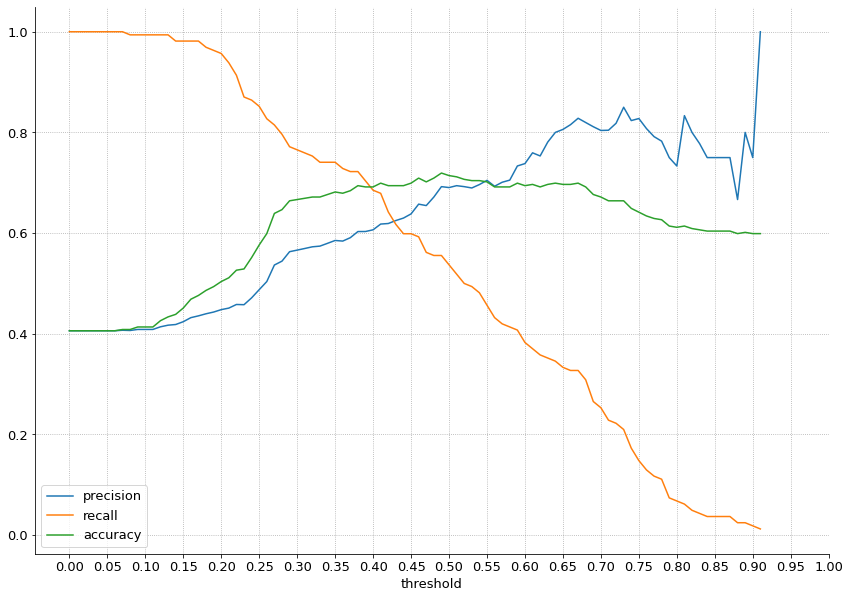

In [16]:
# plot metrics vs thresholds
logistic_regression_util.plot_metrics_by_thresholds(y_train, y_pred_proba.survived)

In [17]:
#create a function to calculate the metrics
def get_metrics_logit(logit, X, y):
    y_pred = logit.predict(X)
    accuracy = logit.score(X, y)
    conf = confusion_matrix(y, y_pred)
    class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    print(f'''
    The accuracy for our model is: {accuracy:.2%}
    The True Positive Rate is: {tpr:.2%}
    The False Positive Rate is: {fpr:.2%}
    The True Negative Rate is: {tnr:.2%}
    The False Negative Rate is: {fnr:.2%}
    ''')
    return prfs

In [18]:
get_metrics_logit(logit, X_train[['age', 'fare', 'pclass']], y_train)


    The accuracy for our model is: 71.43%
    The True Positive Rate is: 53.70%
    The False Positive Rate is: 16.46%
    The True Negative Rate is: 83.54%
    The False Negative Rate is: 46.30%
    


,0,1
precision,0.725275,0.690476
recall,0.835443,0.537037
f1-score,0.776471,0.604167
support,237.000000,162.000000


# 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [19]:
# create the object
# Define the logistic regression model
logit1 = LogisticRegression(random_state=3210)

In [20]:
# fit the model on train data
# using: age, fare and pclass
logit1.fit(X_train[['age', 'fare', 'pclass', 'sex']], y_train)

LogisticRegression(random_state=3210)

In [21]:
# now use the model to make predictions
y_pred = logit1.predict(X_train[['age', 'fare', 'pclass', 'sex']])

In [22]:
#take a look at predictions
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [23]:
# View raw probabilities (output from the model)


y_pred_proba = logit1.predict_proba(X_train[['age', 'fare', 'pclass', 'sex']])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

,not-survived,survived
0,0.312551,0.687449
1,0.762156,0.237844
2,0.045117,0.954883
3,0.910770,0.089230
4,0.091893,0.908107


In [24]:
get_metrics_logit(logit1, X_train[['age', 'fare', 'pclass', 'sex']], y_train)


    The accuracy for our model is: 81.70%
    The True Positive Rate is: 74.69%
    The False Positive Rate is: 13.50%
    The True Negative Rate is: 86.50%
    The False Negative Rate is: 25.31%
    


,0,1
precision,0.833333,0.790850
recall,0.864979,0.746914
f1-score,0.848861,0.768254
support,237.000000,162.000000


# 3. Try out other combinations of features and models.

In [25]:
# create the object
# Define the logistic regression model
logit2 = LogisticRegression(random_state=3210)

In [26]:
# fit the model on train data
# using: age, fare and pclass
logit2.fit(X_train, y_train)

LogisticRegression(random_state=3210)

In [27]:
# now use the model to make predictions
y_pred = logit2.predict(X_train)

In [28]:
#take a look at predictions
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [29]:
# View raw probabilities (output from the model)


y_pred_proba = logit2.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

,not-survived,survived
0,0.464271,0.535729
1,0.713128,0.286872
2,0.028781,0.971219
3,0.899065,0.100935
4,0.071140,0.928860


In [30]:
get_metrics_logit(logit2, X_train, y_train)


    The accuracy for our model is: 82.21%
    The True Positive Rate is: 70.99%
    The False Positive Rate is: 10.13%
    The True Negative Rate is: 89.87%
    The False Negative Rate is: 29.01%
    


,0,1
precision,0.819231,0.827338
recall,0.898734,0.709877
f1-score,0.857143,0.764120
support,237.000000,162.000000


# 4. Use your best 3 models to predict and evaluate on your validate sample.

In [33]:
# logit metrics on validate
features = ['age', 'fare', 'pclass']

y_pred = logit.predict(X_validate[features])

get_metrics_logit(logit, X_validate[features], y_validate)


    The accuracy for our model is: 69.77%
    The True Positive Rate is: 54.29%
    The False Positive Rate is: 19.61%
    The True Negative Rate is: 80.39%
    The False Negative Rate is: 45.71%
    


,0,1
precision,0.719298,0.655172
recall,0.803922,0.542857
f1-score,0.759259,0.593750
support,102.000000,70.000000


In [34]:
# logit1 metrics on validate
features = ['age', 'fare', 'pclass', 'sex']

y_pred = logit1.predict(X_validate[features])

get_metrics_logit(logit1, X_validate[features], y_validate)


    The accuracy for our model is: 79.07%
    The True Positive Rate is: 81.43%
    The False Positive Rate is: 22.55%
    The True Negative Rate is: 77.45%
    The False Negative Rate is: 18.57%
    


,0,1
precision,0.858696,0.712500
recall,0.774510,0.814286
f1-score,0.814433,0.760000
support,102.000000,70.000000


In [35]:
# logit2 metrics on validate

y_pred = logit2.predict(X_validate)

get_metrics_logit(logit2, X_validate, y_validate)


    The accuracy for our model is: 80.23%
    The True Positive Rate is: 78.57%
    The False Positive Rate is: 18.63%
    The True Negative Rate is: 81.37%
    The False Negative Rate is: 21.43%
    


,0,1
precision,0.846939,0.743243
recall,0.813725,0.785714
f1-score,0.830000,0.763889
support,102.000000,70.000000


In [37]:
# Make prediction for validate dataset

y_pred_validate = logit.predict(X_validate[['age', 'fare', 'pclass']])
y_pred_validate1 = logit1.predict(X_validate[['age', 'fare', 'pclass', 'sex']])
y_pred_validate2 = logit2.predict(X_validate)

# 5. Choose your best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

### Bonus 1
How do different strategies for handling the missing values in the age column affect model performance?

### Bonus 2
How do different strategies for encoding sex affect model performance?

### Bonus 3
`scikit-learn`'s `LogisticRegression` classifier is actually applying a regularization penalty to the coefficients by default: https://en.wikipedia.org/wiki/Regularized_least_squares 
- This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. 
- This value can be modified with the `C` hyper parameter. 
    - Small values of `C` correspond to a larger penalty, and 
    - large values of `C` correspond to a smaller penalty.

Try out the following values for `C` and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

- C =
    - .01
    - .1
    - 1
    - 10
    - 100
    - 1000

### Bonus Bonus: 
how does scaling the data interact with your choice of `C`?